# Boosting Ensemble in Machine Learning

It is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers.

It iteratively corrects the errors made by previous model by adding some weights using upsampling to the misclassified instances, to gradually improve the performance of ensemble models.

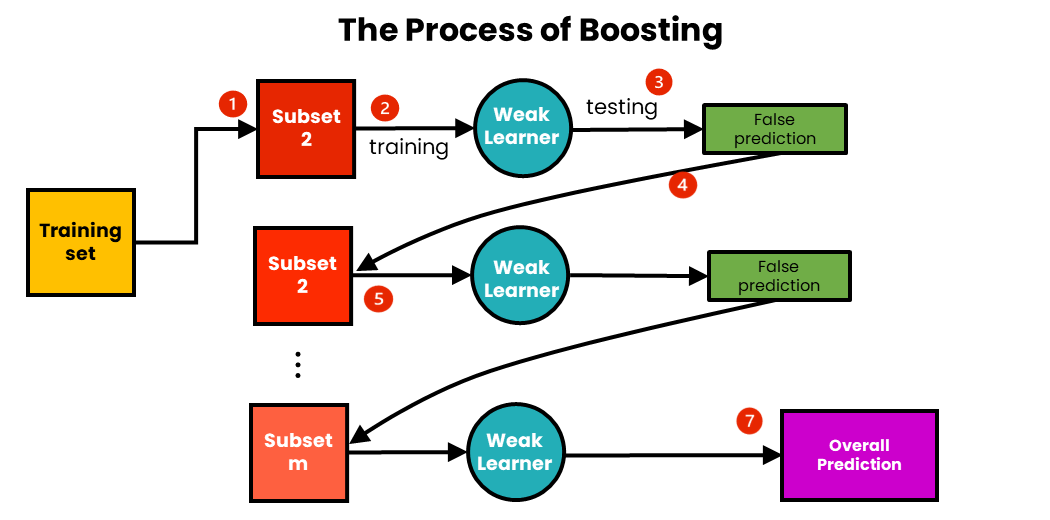

### Advantages of Boosting

* **Improved Accuracy** - It improves the accuracy of the model by combining several weak models' accuracies and averaging them for regression or voting over them for classification to increase the accuracy of the final model.

* **Robustness to Overfitting** - It reduces the risk of overfitting by reweighting the inputs that are classified wrongly.

* **Better handling of imbalanced data** - It handles the imbalance data by focusing more on the data points that are misclassified.

* **Better Interpretability** - It increases the interpretability of the model by breaking the model decision process into multiple processes.  


# AdaBoost Algorithm

It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner.

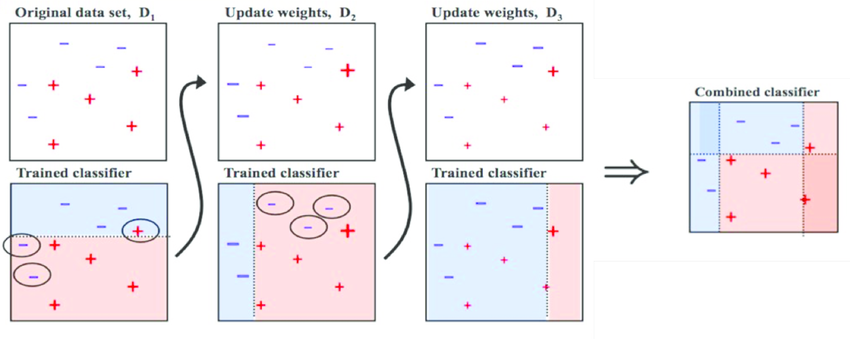

## Basic Principle:

* AdaBoost operates by sequentially training a series of weak learners, where each subsequent model focuses on the mistakes made by the previous models.

* It assigns higher weights to incorrectly classified samples, effectively forcing the subsequent models to pay more attention to these samples during training.

## AdaBoost Algorithm with Decision Stumps

A decision stump is a machine learning model consisting of a one-level decision tree.

It makes a prediction based on the value of just a single input feature.

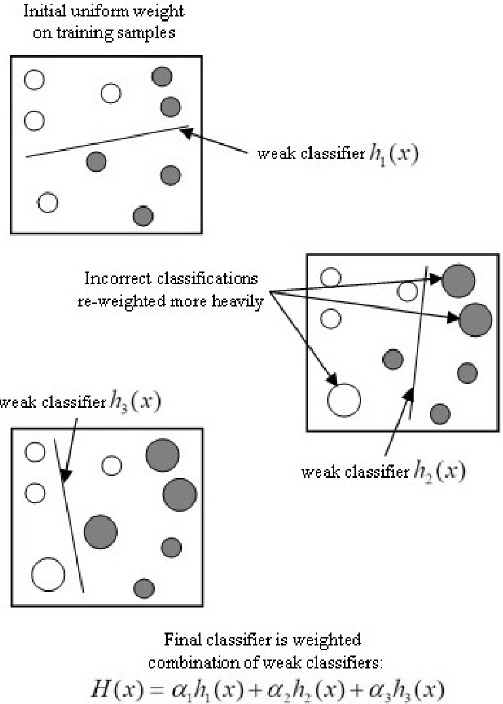

## Implementing AdaBoost Classifier in Python

In [98]:
import numpy as np
import pandas as pd

In [74]:
from sklearn.datasets import make_classification

In [75]:
X, y = make_classification(n_samples=100, n_features=3, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [80]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.model_selection import train_test_split

In [76]:
train_inputs, test_inputs, train_target, test_target = train_test_split(X, y, test_size = 0.3)

## Building our own AdaBoost Class

I am using Decision Stumps, (i.e. Decision Tree with 1 Node) as weak learners.


## Step-by-step AdaBoost algorithm:

1. **Initialization of Parameters:**

* Start by initializing the AdaBoost classifier with the specified number of weak learners (estimators), training inputs, and target labels.
* Set up initial weights for each training sample, ensuring they sum up to 1.

2. **Training Weak Learners:**

* Train a weak learner (often a decision stump) using the training data and the current weights assigned to each sample.
* Evaluate the performance of the weak learner and compute its weighted error rate.

3. **Update Weights:**

* Adjust the weights of the training samples based on the performance of the weak learner.
* Increase the weights of incorrectly classified samples to emphasize their importance in subsequent iterations.

4. **Combine Weak Learners:**

* Record the trained weak learner and its corresponding weight (alpha) to be used in the final ensemble model.
* Repeat steps 2 and 3 for the specified number of weak learners (estimators).

5. **Final Prediction:**

* Combine the predictions of all weak learners by weighting each prediction according to its corresponding alpha value.
* Take the sign of the sum of weighted predictions as the final prediction for each test input.

In [88]:
class AdaBoostClassifier():

    # Initialize AdaBoostClassifier with the specified number of estimators, training inputs, and target
    def __init__(self, n_estimator, train_inputs, train_target):
        self.n_estimator = n_estimator
        self.train_inputs = train_inputs
        self.train_target = train_target
        self.N = train_inputs.shape[0]
        self.alpha = []

        # Initializing weights -- need to be updated after each iteration
        self.weights = np.ones(self.N)/self.N


        # Recording Classifiers
        self.clfs = []


    # Train a weak learner (Decision Tree with max_depth=1) using the current weights
    def train_weak_learners(self):

        dt = DecisionTreeClassifier(max_depth = 1)
        weak_learner = dt.fit(self.train_inputs, self.train_target, sample_weight=self.weights)
        return weak_learner

    # Updating misclassifiednstances weights'
    def update_weights(self, weak_learner):
        # Get predictions from the weak learner
        predictions = weak_learner.predict(self.train_inputs)

        # Identify incorrectly classified samples
        incorrect = (predictions != self.train_target)

        # Compute the weighted error rate
        weighted_error = np.sum(self.weights[incorrect])

        # Calculate alpha, the weight of the current weak learner
        alpha = 0.5 * np.log((1 - weighted_error) / (weighted_error + 1e-10))  # Avoid division by zero

        # Append alpha to the list of alpha values
        self.alpha.append(alpha)

        # Update weights based on the performance of the weak learner
        self.weights *= np.exp(-alpha * self.train_target * predictions)

        # Normalize weights to ensure they sum up to 1
        self.weights /= np.sum(self.weights)


    # Train the AdaBoost ensemble by iterating over the specified number of estimators
    def fit(self):
       for _ in range(self.n_estimator):
          weak_learner = self.train_weak_learners() # Training !1st Weak-Learner
          self.clfs.append(weak_learner) # Recording the trained Weak-Learners
          self.update_weights(weak_learner) # Updating weights based on the weak learner's performance


    # Predict the labels of test inputs using the trained ensemble of weak learners
    def predict(self, test_inputs):
        predictions = np.zeros(len(test_inputs))

        # Ensure self.alpha is an array with the same length as self.clfs
        if len(self.alpha) != len(self.clfs):
            raise ValueError("Length of alpha does not match the number of weak learners.")

        # Iterate over weak learners and corresponding alpha values
        for clf, alpha in zip(self.clfs, self.alpha):
            predictions += alpha * clf.predict(test_inputs)

        return np.sign(predictions) # Return the sign of the sum of weighted predictions


In [90]:
ada_boost = AdaBoostClassifier(n_estimator=10, train_inputs=train_inputs, train_target=train_target)
ada_boost.fit()

In [91]:
y_pred = ada_boost.predict(test_inputs)

In [85]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(test_target, y_pred)

1.0

In [93]:
y_pred

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

In [94]:
test_target

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

## Validating the Accuracy

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [96]:
# AdaBoost with default hyperparameters

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

1.0

**sklearn AdaBoostClassifier** is giving exactly same as our made **AdaBoostClassifier **Class.

*Note: I have built a custom class to facilitate a better understanding of Stochastic Gradient Descent. Consequently, I would recommend utilizing the scikit-learn library for the development of your model.*


## Advantage

* AdaBoost is easy to implement and iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners.

* You can use many base classifiers with AdaBoost.

* AdaBoost is not prone to overfitting.

## Disadvantage

* AdaBoost is highly affected by outliers because it tries to fit each point perfectly.

* AdaBoost is slower compared to XGBoost.

> Stay tuned for other Boosting Models and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.